# Foundation of Data Science (25 points)
## Homework 4

Student Name: Pranjal Jain

Student Netid: pj2069
***

### Part 1: Critique this plan (10 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm.

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a
large database of consumers who can be targeted.  We will build a predictive model
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a decision tree (DT) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of
this service.  The model will be based on their demographics and their usage of
the service. We believe that DT is the best choice of method be-
cause it is a tried-and-true modeling technique, and we can easily
interpret the model to infer whether the attributes make sense. We will apply the model to our large
database of consumers, and select out those who have not yet subscribed and whom
the DT model predicts to be likely to subscribe.  To these we will send
the targeted offer. As this is a fixed-profit-per-customer service, this also
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

**Write your answer here.**

Flaws and their solutions:



1) The consultant mentions that they have a large database of customers which can be targetted for which he doesn't provide any reason or insight. A large database, no matter how large, will never insure that the product is being sold to the right customers. A way to solve this would be to run correlation with respect to customers that the company has already sold to and the database.

2) The consultant also claims that decision tree should be used as it is tried and true modeling technique. While DT could be effective, there needs to be extensive testing and comparison of different models to show which has a high accuracy.

3) There is also no details provided about the distribution of data and the features that will be used. Not all attributes will help predicting the dependent variable and we need to hence use a correlation matrix to figure out the similatity and understand which attributes contribute to the solution.

4) There is no details given about a standarised test and training set, supervised learning could prove to be difficult. there are no details given for the hyperparameters that will be used and if the early estimates are not just overfitting the data. A good alternate could be to be using Clustering and then targetting the customers based on their unique attributes.

### Part 2: Working with Time Series (15 points + option for 4 bonus points)

Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008 (use file cases.csv for this section).

1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools and the library statsmodels). (1 point)

In [ ]:
#write your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson
%matplotlib inline

yf_cases = pd.read_csv('cases (2).csv')
yf_cases['YEAR'] = pd.to_datetime(yf_cases['YEAR'], format='%Y')
yf_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   YEAR     309 non-null    datetime64[ns]
 1   YFCASES  309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


2\. Plot the autocorrelation function (ACF) for the cases timeseries (hint: use statsmodels plot_acf for that). (2 points)

To learn more about how to interpret these graphs, you may find this useful: https://medium.com/analytics-vidhya/interpreting-acf-or-auto-correlation-plot-d12e9051cd14

Text(0.5, 1.0, 'Time Series Graph: Yellow Fever Cases')

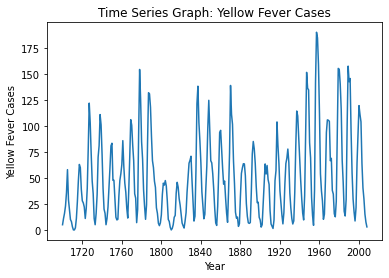

In [ ]:
#write your code here

plt.plot(yf_cases['YEAR'],yf_cases['YFCASES'])
plt.xlabel('Year')
plt.ylabel('Yellow Fever Cases')
plt.title('Time Series Graph: Yellow Fever Cases')

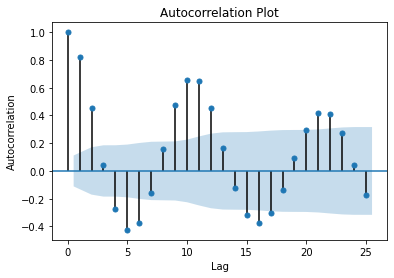

In [ ]:
plot_acf(yf_cases['YFCASES'])
plt.title('Autocorrelation Plot')
plt.ylabel('Autocorrelation')
plt.xlabel('Lag')

plt.show()


3\. An approach to assess the presence of a significant autocorrelation in the data is to use the Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is the DW for our data? Does this suggest that the data has a relatively high or a relatively low autocorrelation? (2 point)

In [ ]:
#write your code here

least=OLS(yf_cases["YFCASES"],np.ones(len(yf_cases["YFCASES"]))).fit()
durbin_watson(least.resid)

0.3512685516583166

In [ ]:
# place your written answer here

#Since the DW statistic is more than zero and way less than 2, this tells us that there is high positive corelation among the values.

4. Now we will make a forecast on this time series. What time horizon will you use and how do you pick it? (2 points)

0.5
155


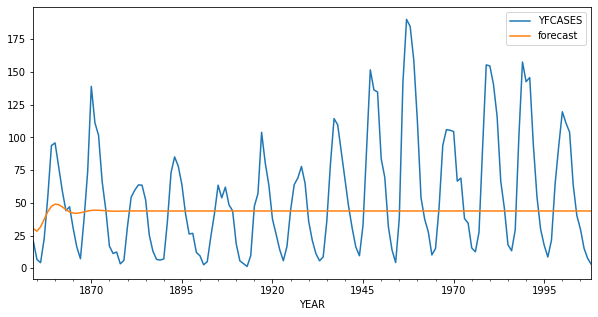

0.2
62


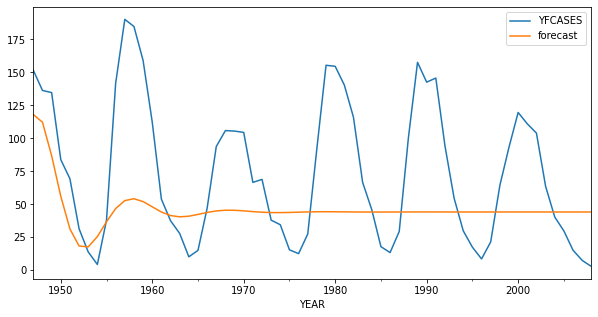

0.1
31


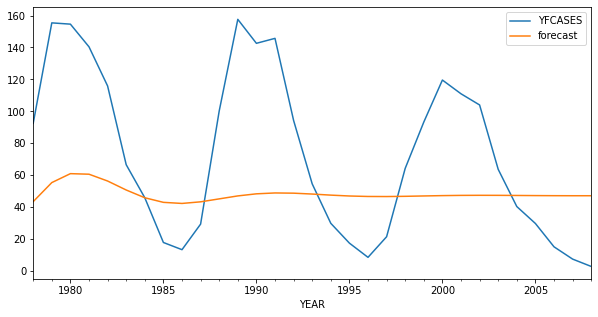

In [ ]:
# place your written answer here

#by checking multiple time forcast series we can using different datasets, we can find the optimal horizon
import warnings
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

from statsmodels import tsa
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split

yf_casesNew= yf_cases.copy()
distr = [0.5,0.2, 0.1]
for i in distr:
  print(i)
  indexedFever=yf_casesNew.set_index("YEAR")
  cases=indexedFever.astype(float)

  train, test = train_test_split(cases, test_size=i, shuffle = False)

  arma_result = sm.tsa.ARMA(train,(2,0)).fit()
  counter = test.shape[0]
  print(counter)
  test['forecast'] = arma_result.predict(start = (309- counter) , end= 309 ,dynamic= True)
  test[['YFCASES', 'forecast']].plot(figsize=(10, 5))
  plt.show()
  #sns.regplot(data=test, x='forecast', y='YFCASES', ci=None)








For 5 Years: 



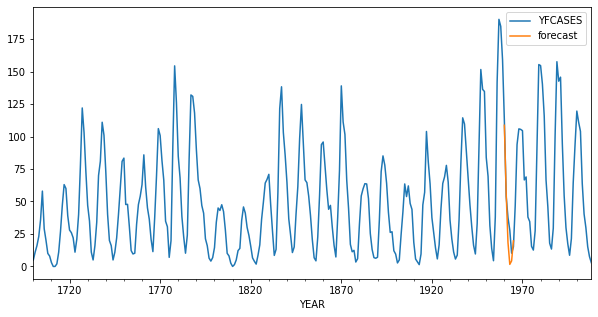



For 10 Years: 



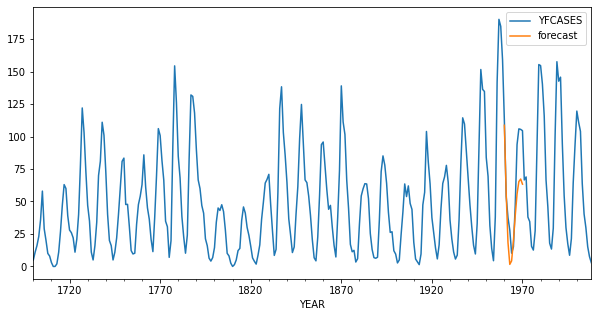



For 15 Years: 



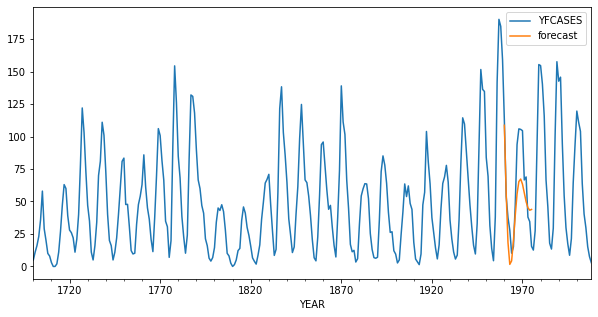



For 20 Years: 



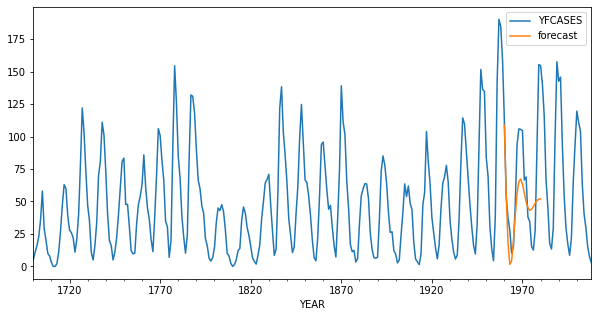



For 40 Years: 



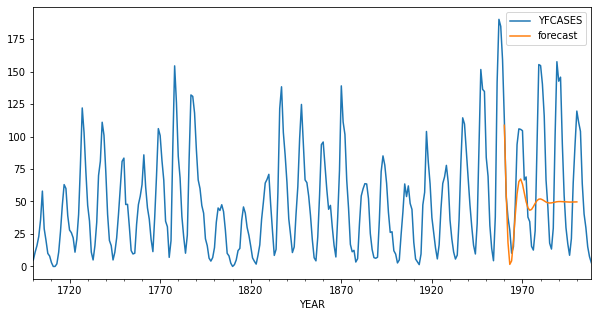



For 49 Years: 



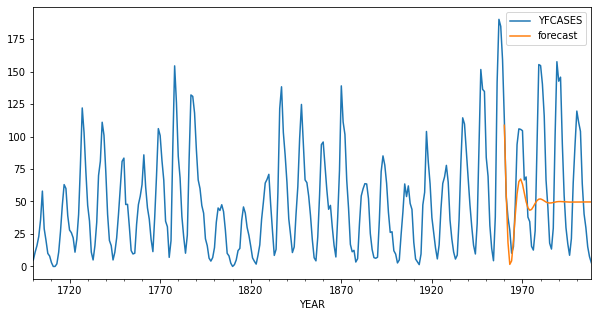

In [ ]:


#by checking multiple time forcast series we can using different datasets, we can find the optimal horizon
import warnings
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

from statsmodels import tsa
import statsmodels.api as sm
import seaborn as sns


#We plot the predictions for multiple time ranges and see when does the predictions not correlate with the data anymore! We are using the entire dataset for training
yf_casesNew = yf_cases.copy()

print("\n")
print("For 5 Years: \n")
yf_casesNew = yf_cases.set_index("YEAR")
cases = yf_casesNew.astype(float)
arma_result = sm.tsa.ARMA(cases,(2,0)).fit()
cases['forecast'] = arma_result.predict(start = 260 , end= 265, dynamic= True)
cases[['YFCASES', 'forecast']].plot(figsize=(10, 5))
plt.show()

print("\n")
print("For 10 Years: \n")
yf_casesNew = yf_cases.set_index("YEAR")
cases = yf_casesNew.astype(float)
arma_result = sm.tsa.ARMA(cases,(2,0)).fit()
cases['forecast'] = arma_result.predict(start = 260 , end= 270, dynamic= True)
cases[['YFCASES', 'forecast']].plot(figsize=(10, 5))
plt.show()

print("\n")
print("For 15 Years: \n")
yf_casesNew = yf_cases.set_index("YEAR")
cases = yf_casesNew.astype(float)
arma_result = sm.tsa.ARMA(cases,(2,0)).fit()
cases['forecast'] = arma_result.predict(start = 260 , end= 275, dynamic= True)
cases[['YFCASES', 'forecast']].plot(figsize=(10, 5))
plt.show()

print("\n")
print("For 20 Years: \n")
yf_casesNew = yf_cases.set_index("YEAR")
cases = yf_casesNew.astype(float)
arma_result = sm.tsa.ARMA(cases,(2,0)).fit()
cases['forecast'] = arma_result.predict(start = 260 , end= 280, dynamic= True)
cases[['YFCASES', 'forecast']].plot(figsize=(10, 5))
plt.show()


print("\n")
print("For 40 Years: \n")
yf_casesNew = yf_cases.set_index("YEAR")
cases = yf_casesNew.astype(float)
arma_result = sm.tsa.ARMA(cases,(2,0)).fit()
cases['forecast'] = arma_result.predict(start = 260 , end= 300, dynamic= True)
cases[['YFCASES', 'forecast']].plot(figsize=(10, 5))
plt.show()

print("\n")
print("For 49 Years: \n")
yf_casesNew = yf_cases.set_index("YEAR")
cases = yf_casesNew.astype(float)
arma_result = sm.tsa.ARMA(cases,(2,0)).fit()
cases['forecast'] = arma_result.predict(start = 260 , end= 309, dynamic= True)
cases[['YFCASES', 'forecast']].plot(figsize=(10, 5))
plt.show()

In [ ]:
#Picking 10 years seems optimal as after that most predictions plateau.

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(yf_cases['YFCASES'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.837781
p-value: 0.053076
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


5. Now use a simple moving average. Show plots for a forecast for your horizon with a series of different averaging windows, to show how you can pick one (3 points)

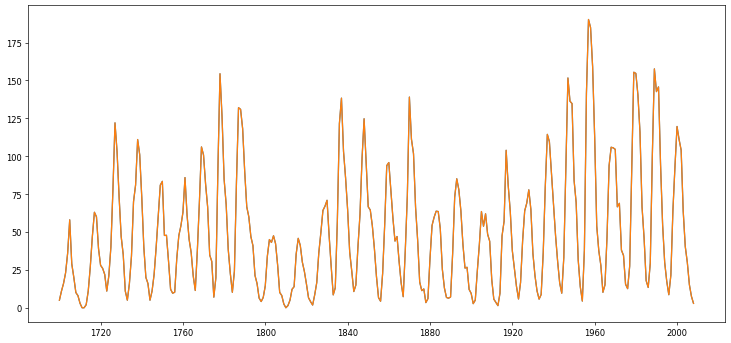

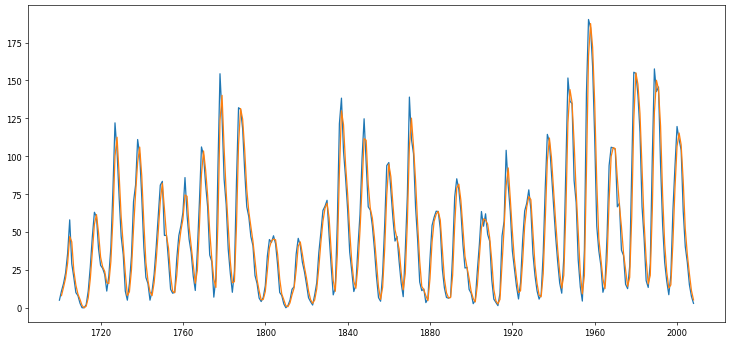

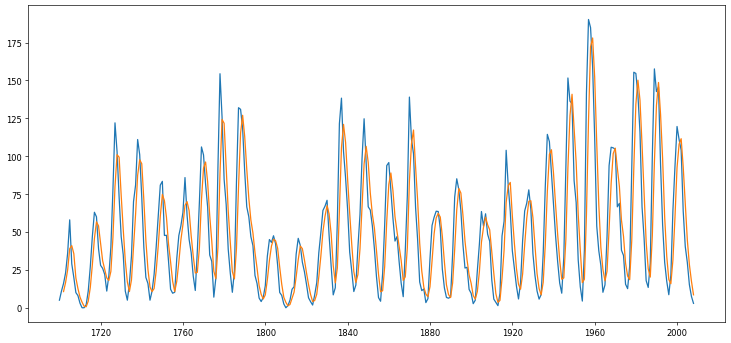

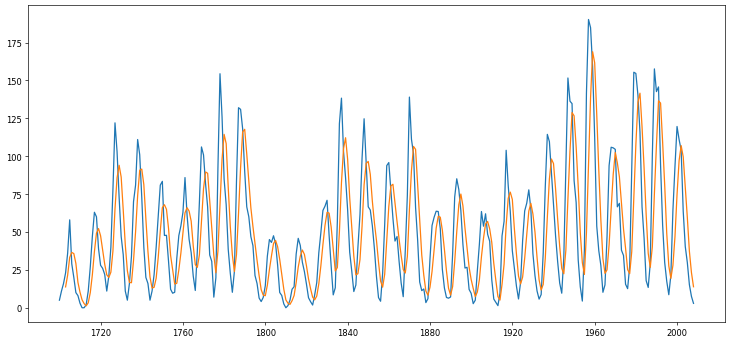

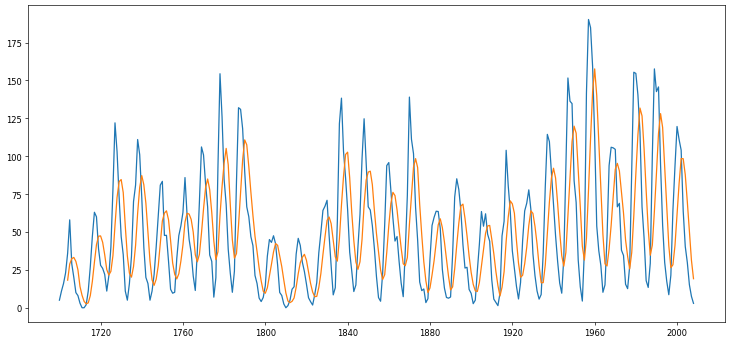

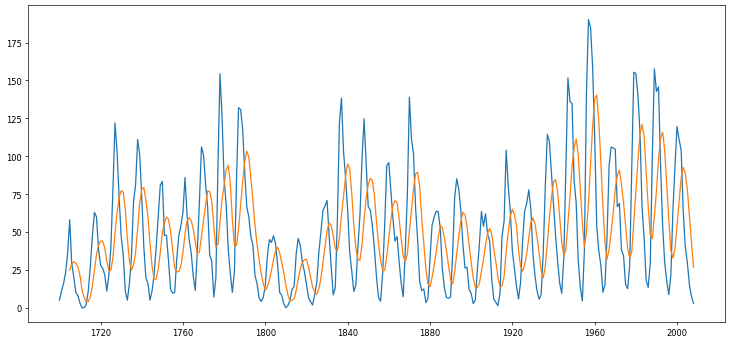

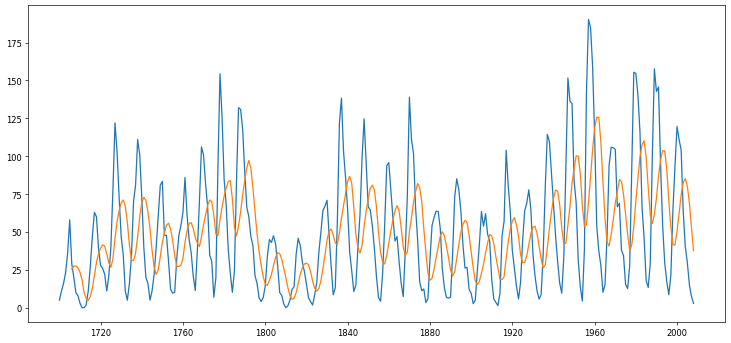

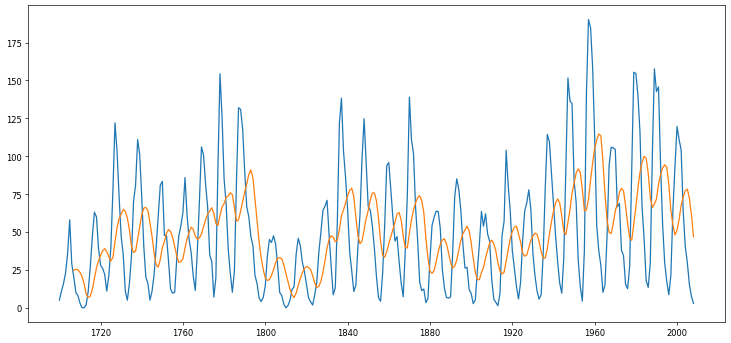

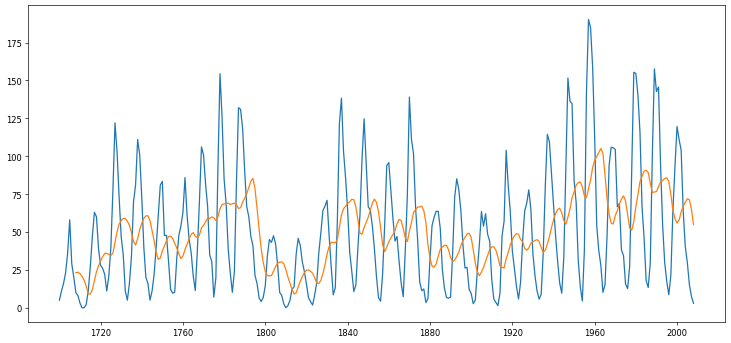

In [ ]:
#place your code here
from matplotlib.pyplot import figure
for i in range(1,10):
  figure(figsize=(15, 7), dpi=60)
  rolling = yf_cases['YFCASES'].rolling(window=i)
  rolling_mean = rolling.mean()
  plt.plot(yf_cases['YEAR'],yf_cases['YFCASES'])
  plt.plot(yf_cases['YEAR'],rolling_mean)
  plt.show()

6. Will a weighted moving average be helpful here? (2 points)

In [ ]:
# place your written answer here

#Yes a weighted moving average prove to be better as Yellow fewer cases in the immediate past effect and constribute the currect cases more.
# A weighted average can prove to be more helpful

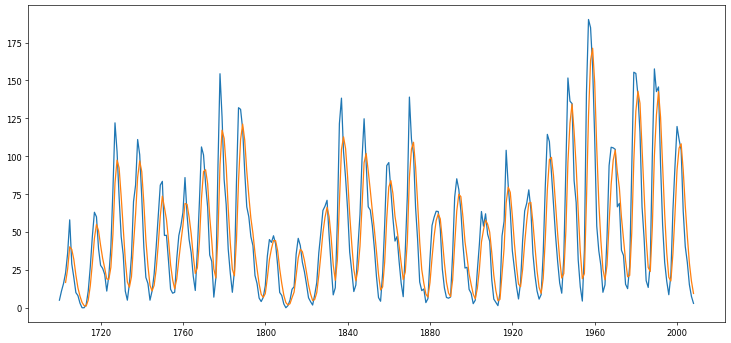

Without Weighted average


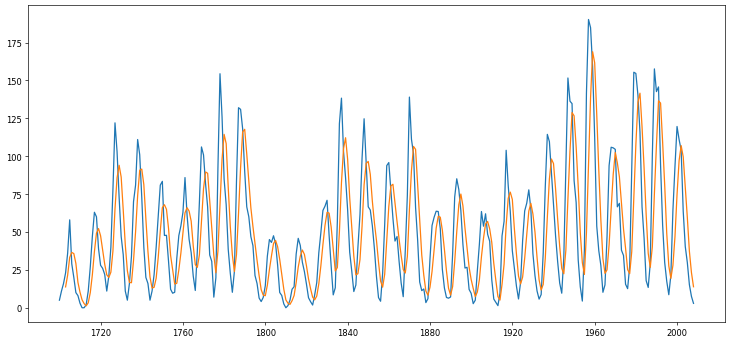

In [ ]:
df= yf_cases.copy()

figure(figsize=(15, 7), dpi=60)
weights = np.array([0.1, 0.2, 0.3, 0.4])
df['WMA'] = df['YFCASES'].rolling(4).apply(lambda x: np.sum(weights*x))
plt.plot(yf_cases['YEAR'],yf_cases['YFCASES'])
plt.plot(df['YEAR'],df['WMA'])


plt.show()
print("Without Weighted average")
figure(figsize=(15, 7), dpi=60)
rolling = yf_cases['YFCASES'].rolling(window=4)
rolling_mean = rolling.mean()
plt.plot(yf_cases['YEAR'],yf_cases['YFCASES'])
plt.plot(yf_cases['YEAR'],rolling_mean)

plt.show()

7. Evaluate your selected moving average with an appropriate evaluation metric. What do you use and what does it show you? (3 points)

Without Weighted average


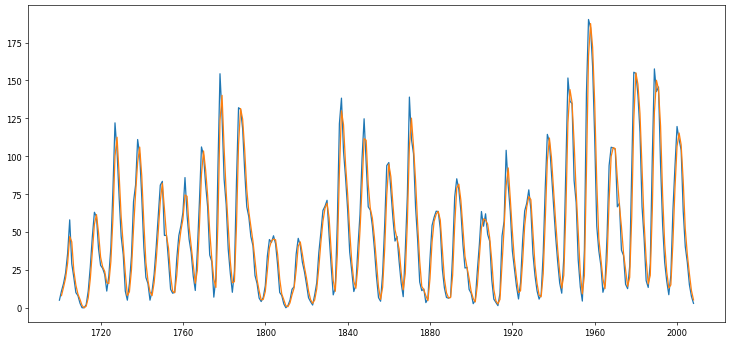

In [ ]:
print("Without Weighted average")
figure(figsize=(15, 7), dpi=60)
rolling = yf_cases['YFCASES'].rolling(window=2)
rolling_mean = rolling.mean()
plt.plot(yf_cases['YEAR'],yf_cases['YFCASES'])
plt.plot(yf_cases['YEAR'],rolling_mean)

plt.show()

In [ ]:
#place your code here

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rolling_mean[0] = 5.0
rolling_mean[1] = 11.0
rolling_mean[2] =  16.0

#first three values are not considered becuase we do not have a mean


mean_absolute_error = mean_absolute_error(yf_cases["YFCASES"],rolling_mean)
mean_squared_error = mean_squared_error(yf_cases["YFCASES"],rolling_mean)

print("mean_absolute_error is ", mean_absolute_error , "\n")
print("mean_squared_error is", mean_squared_error)



mean_absolute_error is  9.052588996763754 

mean_squared_error is 143.19063915857603


In [ ]:
# place your written answer here

# We can use the use mean abolute error, which finds the difference in the predicted values and actual values and means them,
# We see that the values are very high and shows a sign for bad fit.

8. (Bonus). You can also investigate an ARIMA model for forecasting. First remove any trend/seasonality (hint, use differencing). What parameters for the AR and MA components of the model do you choose? How does the forecast using ARIMA compare to just the moving average? (up to 4 bonus points).

In [ ]:
#place your code here

from statsmodels.tsa.stattools import adfuller
result = adfuller(yf_cases['YFCASES'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.837781
p-value: 0.053076
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


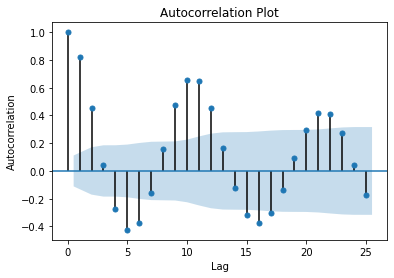

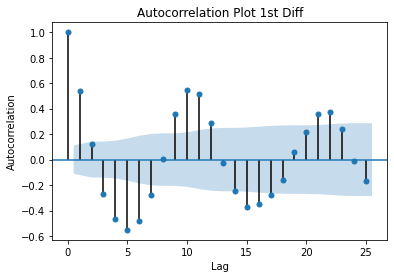

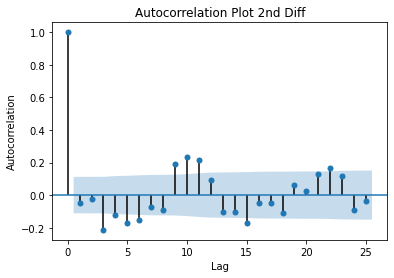

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt



# Original Series

plot_acf(yf_cases['YFCASES'])
plt.title('Autocorrelation Plot')
plt.ylabel('Autocorrelation')
plt.xlabel('Lag')

plt.show()


plot_acf(yf_cases['YFCASES'].diff().dropna())
plt.title('Autocorrelation Plot 1st Diff')
plt.ylabel('Autocorrelation')
plt.xlabel('Lag')

plt.show()




plot_acf(yf_cases['YFCASES'].diff().diff().dropna())
plt.title('Autocorrelation Plot 2nd Diff')
plt.ylabel('Autocorrelation')
plt.xlabel('Lag')

plt.show()


#by looking at the graph we choose 1st order diff as the appropriare
#we can also set p as

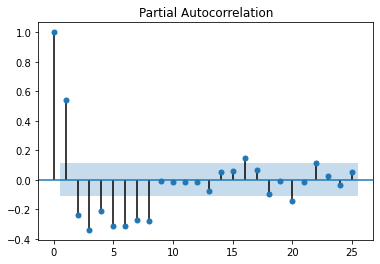

In [ ]:

plot_pacf(yf_cases['YFCASES'].diff().dropna())

plt.show()

#we can set q as 0 as only few lines are above the significant line

#The partial autocorrelation plot shows sharp spikes at lag of 1 and 2 so we set p as 2

In [ ]:
# place your written answer here

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(yf_cases['YFCASES'], order=(2,1,0))
model_fit = model.fit(disp=0)

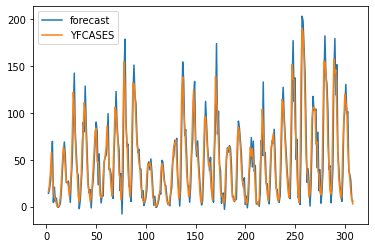

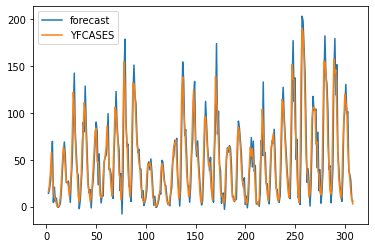

In [ ]:
model_fit.plot_predict(dynamic=False)

In [ ]:
# place your written answer here


#ARIMA performs better as it can integrate the non stationarity of the data when doing a predition so we get a more accurate answer